In [37]:
import os 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from glob import glob
from skimage.io import imread 
from skimage.transform import resize 
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits  

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D, Conv2D, MaxPooling2D, Input 
from tensorflow.keras.optimizers import Adamax


In [38]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [39]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [40]:
def valid_df(val_path):
    classes, class_paths = zip(*[(label, os.path.join(val_path, label, image))
                                 for label in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, label))
                                 for image in os.listdir(os.path.join(val_path, label))])

    val_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return val_df

In [41]:
tr_df = train_df('dataset/LCC_FASD/LCC_FASD_training')
tr_df

,Class Path,Class
0,dataset/LCC_FASD/LCC_FASD_training\real\AA5742...,real
1,dataset/LCC_FASD/LCC_FASD_training\real\AA5742...,real
2,dataset/LCC_FASD/LCC_FASD_training\real\AA5742...,real
3,dataset/LCC_FASD/LCC_FASD_training\real\AA5742...,real
4,dataset/LCC_FASD/LCC_FASD_training\real\AA5742...,real
...,...,...
8294,dataset/LCC_FASD/LCC_FASD_training\spoof\YOUTU...,spoof
8295,dataset/LCC_FASD/LCC_FASD_training\spoof\YOUTU...,spoof
8296,dataset/LCC_FASD/LCC_FASD_training\spoof\YOUTU...,spoof
8297,dataset/LCC_FASD/LCC_FASD_training\spoof\YOUTU...,spoof


In [42]:
ts_df = test_df('dataset/LCC_FASD/LCC_FASD_test')
ts_df

,Class Path,Class
0,dataset/LCC_FASD/LCC_FASD_test\real\real_0.png,real
1,dataset/LCC_FASD/LCC_FASD_test\real\real_1.png,real
2,dataset/LCC_FASD/LCC_FASD_test\real\real_10.png,real
3,dataset/LCC_FASD/LCC_FASD_test\real\real_100.png,real
4,dataset/LCC_FASD/LCC_FASD_test\real\real_101.png,real
...,...,...
7575,dataset/LCC_FASD/LCC_FASD_test\spoof\spoof_995...,spoof
7576,dataset/LCC_FASD/LCC_FASD_test\spoof\spoof_996...,spoof
7577,dataset/LCC_FASD/LCC_FASD_test\spoof\spoof_997...,spoof
7578,dataset/LCC_FASD/LCC_FASD_test\spoof\spoof_998...,spoof


In [43]:
val_df = valid_df('dataset/LCC_FASD/LCC_FASD_test')
val_df

,Class Path,Class
0,dataset/LCC_FASD/LCC_FASD_test\real\real_0.png,real
1,dataset/LCC_FASD/LCC_FASD_test\real\real_1.png,real
2,dataset/LCC_FASD/LCC_FASD_test\real\real_10.png,real
3,dataset/LCC_FASD/LCC_FASD_test\real\real_100.png,real
4,dataset/LCC_FASD/LCC_FASD_test\real\real_101.png,real
...,...,...
7575,dataset/LCC_FASD/LCC_FASD_test\spoof\spoof_995...,spoof
7576,dataset/LCC_FASD/LCC_FASD_test\spoof\spoof_996...,spoof
7577,dataset/LCC_FASD/LCC_FASD_test\spoof\spoof_997...,spoof
7578,dataset/LCC_FASD/LCC_FASD_test\spoof\spoof_998...,spoof


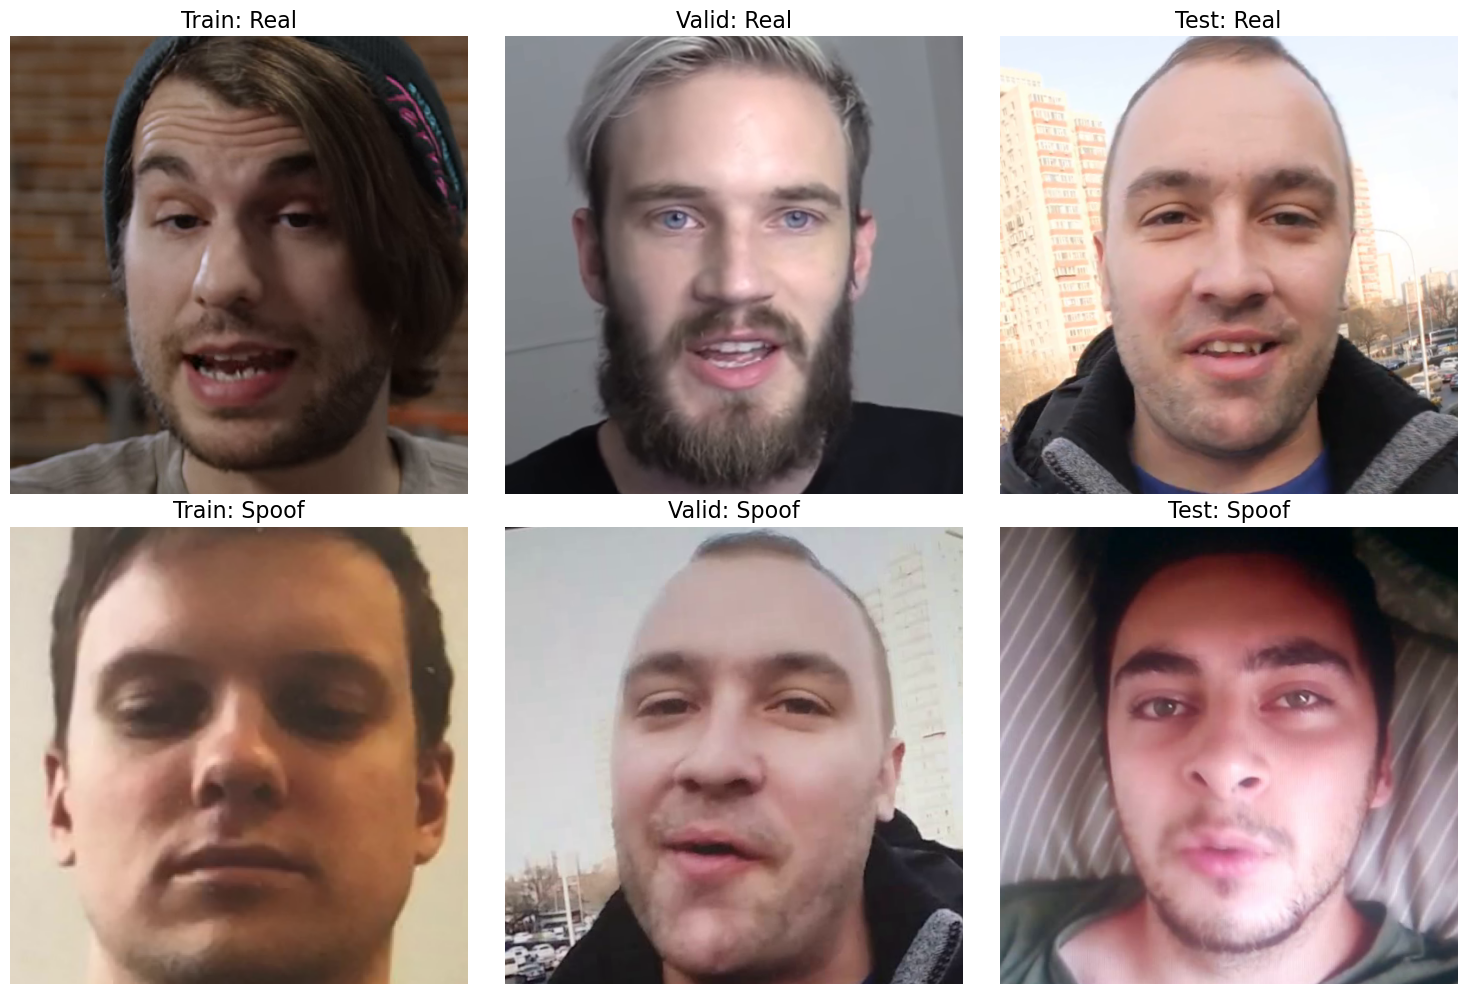

In [44]:
def plot_images(df, ax, row, col, class_label, dataset_name):
    img_path = df[df['Class'] == class_label].sample(1)['Class Path'].values[0] 
    img = imread(img_path)
    ax[row, col].imshow(img)
    ax[row, col].set_title(f"{dataset_name}: {class_label.capitalize()}", fontsize=16)
    ax[row, col].axis('off')

# Create subplots with 2 rows (real, spoof) and 3 columns (train, valid, test)
f, ax = plt.subplots(2, 3, figsize=(15, 10))

# Plot images for each class (real and spoof) in train, valid, and test sets
plot_images(tr_df, ax, 0, 0, 'real', 'Train')  # Real from Train
plot_images(tr_df, ax, 1, 0, 'spoof', 'Train')  # Spoof from Train

plot_images(val_df, ax, 0, 1, 'real', 'Valid')  # Real from Valid
plot_images(val_df, ax, 1, 1, 'spoof', 'Valid')  # Spoof from Valid

plot_images(ts_df, ax, 0, 2, 'real', 'Test')  # Real from Test
plot_images(ts_df, ax, 1, 2, 'spoof', 'Test')  # Spoof from Test

plt.tight_layout()

plt.show()

In [45]:
IMAGE_SIZE = (64, 64)

# Function to load and preprocess images from a directory
def load_images(df, image_size=IMAGE_SIZE):
    images = []
    labels = []
    for index, row in df.iterrows():
        img_path = row['Class Path']
        label = row['Class']
        img = imread(img_path)
        img_resized = resize(img, image_size, anti_aliasing=True)
        images.append(img_resized.flatten())  # Flatten the image into a vector
        labels.append(label)
    return np.array(images), np.array(labels)

In [46]:
# Load the DataFrames for each dataset
train_data = train_df('dataset/LCC_FASD/LCC_FASD_training')
test_data = test_df('dataset/LCC_FASD/LCC_FASD_test')
valid_data = valid_df('dataset/LCC_FASD/LCC_FASD_val')

X_train, y_train = load_images(train_data)
X_test, y_test = load_images(test_data)
X_valid, y_valid = load_images(valid_data)

# Combine validation set with test set 
X_eval = np.concatenate([X_test, X_valid])
y_eval = np.concatenate([y_test, y_valid])

In [ ]:
X_train

In [47]:
X_train.shape, X_valid.shape, X_test.shape

((8299, 12288), (2948, 12288), (7580, 12288))

In [48]:
y_train.shape, y_valid.shape, y_test.shape

((8299,), (2948,), (7580,))

In [49]:
X_train = X_train.reshape(-1, 64, 64, 3)  # Chuyển về dạng ảnh
X_eval = X_eval.reshape(-1, 64, 64, 3)
X_test = X_test.reshape(-1, 64, 64, 3)  # Chuyển về dạng ảnh
X_valid = X_valid.reshape(-1, 64, 64, 3)  # Chuyển về dạng ảnh

In [50]:
X_train.shape, X_valid.shape, X_test.shape

((8299, 64, 64, 3), (2948, 64, 64, 3), (7580, 64, 64, 3))

### CNN

In [51]:
model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

y_train = np.where(y_train == 'real', 0, 1)
y_eval = np.where(y_eval == 'real', 0, 1)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_eval, y_eval))

# Evaluate the model on the evaluation set
cnn_loss, cnn_accuracy = model.evaluate(X_eval, y_eval)
print(f"CNN accuracy: {cnn_accuracy*100:.2f}%")

Epoch 1/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.8483 - loss: 0.3890 - val_accuracy: 0.9326 - val_loss: 0.2349
Epoch 2/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.8715 - loss: 0.3197 - val_accuracy: 0.8854 - val_loss: 0.2871
Epoch 3/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8910 - loss: 0.2803 - val_accuracy: 0.8712 - val_loss: 0.3014
Epoch 4/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.9012 - loss: 0.2375 - val_accuracy: 0.9056 - val_loss: 0.2716
Epoch 5/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9247 - loss: 0.1970 - val_accuracy: 0.8226 - val_loss: 0.4493
Epoch 6/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9393 - loss: 0.1701 - val_accuracy: 0.8256 - val_loss: 0.4283
Epoch 7/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9498 - loss: 0.1467 - val_accuracy: 0.7850 - val_loss: 0.6380
Epoch 8/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9550 - loss: 0.1253 - 

In [52]:
# Predict on the evaluation set
y_pred_cnn = (model.predict(X_eval) > 0.5).astype("int32")  

# Calculate evaluation metrics
cnn_accuracy = accuracy_score(y_eval, y_pred_cnn)
cnn_precision = precision_score(y_eval, y_pred_cnn, average='weighted')  
cnn_recall = recall_score(y_eval, y_pred_cnn, average='weighted')        
cnn_f1 = f1_score(y_eval, y_pred_cnn, average='weighted')               

# Print the metrics
print(f"CNN Accuracy: {cnn_accuracy * 100:.2f}%")
print(f"CNN Precision: {cnn_precision:.2f}")
print(f"CNN Recall: {cnn_recall:.2f}")
print(f"CNN F1 Score: {cnn_f1:.2f}")

329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
CNN Accuracy: 85.73%
CNN Precision: 0.93
CNN Recall: 0.86
CNN F1 Score: 0.88


In [53]:
model.save('models/CNN.keras')